# 🖼️ EXP 07. 인물 모드 문제점 찾기 



* 이번 시간에는 ```pixellib```의 시맨틱 세그멘테이션을 이용해, 아웃 포커싱 기능을 적용시켜보았다.  
* 적용 해 본것은 좋았으나, 아직까지 개선해야할 점이 몇몇 보인다는데.. 
* 오늘 배웠던 시맨틱 세그멘테이션을 다시 한번 복습 해 보고, 문제점은 무엇인지, 개선점은 어떻게 할 것이며, 찾은 개선점을 이용해 인물사진 모드를 개선 해 보자. 



----




# 루브릭 평가 기준 

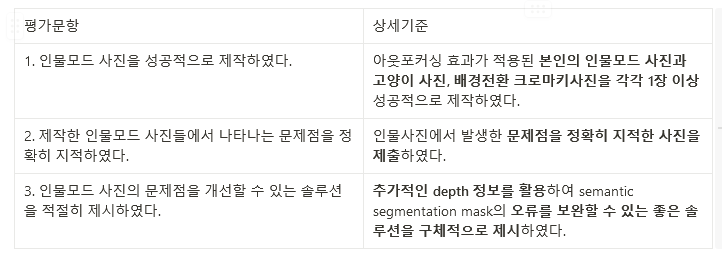



----




# 목차 


## 1. 인물모드 직접 해 보기 

## 2. 다른 이미지에도 적용 해 보기!

## 3. 직접 해 본 사진에서 문제점 찾기 

## 4. 해결 방법을 제안해 보기 

## 회고 

## 참고 페이지 



----




# 1. 인물 모드 직접 해 보기 

## 1-1. 필요한 라이브러리 가져오기

In [2]:
import os
import urllib #웹에서 데이터를 다운로드 할 때 
import cv2 # Open CV
import numpy as np 
from pixellib.semantic import semantic_segmentation # 시맨틱 세그멘테이션 
from pixellib.tune_bg import alter_bg # 이미지 합성
from matplotlib import pyplot as plt
from pixellib.tune_bg import alter_bg

print('라이브러리 불러오기 완료!')

라이브러리 불러오기 완료!


## 1-2 필요한 이미지 가져오기

* 이번 시간에 필요한 이미지는 총 4장. 
* 인물 사진 2장, 동물사진 1장, 합성용 배경사진 1장! 

In [3]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
# 이번 시간에 필요한 이미지를 한방에 불러옵니다b 
pr_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'   
back_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/hawai.jpg'  
bird_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/nari.JPG'  

pr_orig = cv2.imread(pr_path) 
back_orig = cv2.imread(back_path)
bird_orig = cv2.imread(bird_path)


(450, 800, 3)


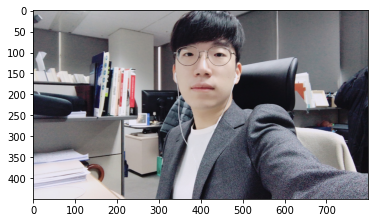

In [4]:
# 복습용 이미지
print(pr_orig.shape)
plt.imshow(cv2.cvtColor(pr_orig, cv2.COLOR_BGR2RGB))
plt.show()

(720, 1280, 3)


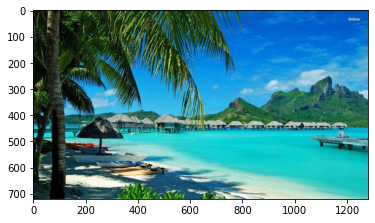

In [5]:
# 합성용 배경 이미지 
print(back_orig.shape)
plt.imshow(cv2.cvtColor(back_orig, cv2.COLOR_BGR2RGB))
plt.show()

(720, 1280, 3)


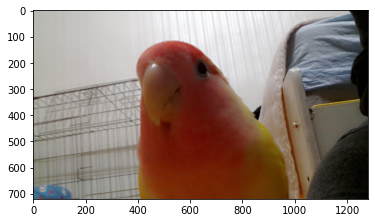

In [6]:
# 합성용 동물 이미지 
print(bird_orig.shape)
plt.imshow(cv2.cvtColor(bird_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 1-3 세그멘테이션으로 사람 분리하기 

* 우선, lms 복습! 세그멘테이션으로 사람을 분리 해 봅시다! 

In [7]:
# Pixellib에서 제공하는 모델을 다운로드 합니다. 

# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)


('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fbddfe40550>)

In [8]:
# 다운로드 한 모델을 이용해 PixelLib로 사용할 세그멘테이션 모델을 생성 

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

print('세그멘테이션 모델 생성이 완료되었습니다:D ')

세그멘테이션 모델 생성이 완료되었습니다:D 


In [9]:
#PASCAL VOC 데이터의 라벨 종류 및 가지 수 

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)


21

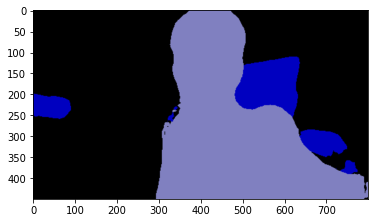

In [10]:
# 모델에 이미지를 입력 해 봅니다. 
# Pascal voc 데이터로 학습된 모델을 이용한다! 라는 의미.
# 출력 값도 같이 확인 해 보겠습니다 

segvalues, output = model.segmentAsPascalvoc(pr_path)
plt.imshow(output)
plt.show()

In [11]:
segvalues

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [12]:
# class_id 를 통해 어떤 물체가 담겨있는지 확인 
for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])

background
chair
person


In [13]:
# 각 클래스 마다 해당되는 색을 colormap 으로 보여줍니다.. 라고 이해했는데.. 
# colormap[class_id] 로 알아볼 수 있다. 

# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

* 여기서 주의점!  
## &nbsp;   output 이미지는 BGR 순서로 채널 배치가 되어있다!

In [14]:
# 사람을 나타내는 15번째 색상은?
colormap[15]

array([192, 128, 128])

In [15]:
# 추출해야할 대상의 색상 값을 순서를 바꿔서 RGB로 해 줘야한단다 
seg_color = (128,128,192)

(450, 800)


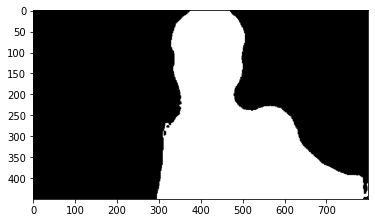

In [16]:
# seg_color 로만 이루어진 마스크를 만들어 봅시다 
#output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

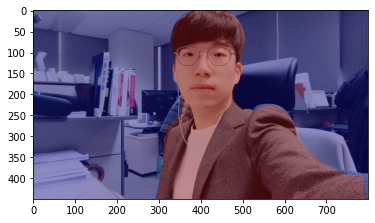

In [17]:
# 원본 이미지와 겹쳐보고, 세그멘테이션이 잘 됬는지 확인!

pr_show = pr_orig.copy()

# True와 False인 값을 각각 255와 0으로 바꿔줍니다.
pr_mask = seg_map.astype(np.uint8) * 255

#255와 0을 적당한 색상으로 바꿉니다.
color_mask = cv2.applyColorMap(pr_mask, cv2.COLORMAP_JET)

#원본 이미지와 마스크를 적당히 합쳐봅니다.
#두 이미지를 섞는 비율은 0.6, 0.4
pr_show = cv2.addWeighted(pr_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(pr_show, cv2.COLOR_BGR2RGB))
plt.show()

## 1-4 배경 흐리게 하기 

* 세그맨테이션으로 나눈 사진의 배경을 흐리게 만들어볼까요~ 

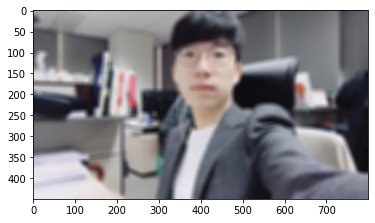

In [18]:
# blur() 함수를 이용해 배경을 흐리게 만들겁니다.
pr_orig_blur = cv2.blur(pr_orig, (13,13))  
plt.imshow(cv2.cvtColor(pr_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

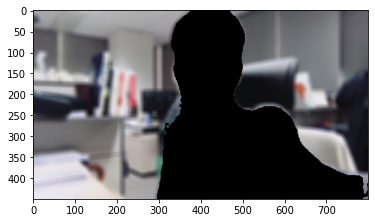

In [19]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해 배경만 추출 
pr_mask_color = cv2.cvtColor(pr_mask, cv2.COLOR_GRAY2BGR)
pr_bg_mask = cv2.bitwise_not(pr_mask_color)
pr_bg_blur = cv2.bitwise_and(pr_orig_blur, pr_bg_mask)
plt.imshow(cv2.cvtColor(pr_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

## 1-5 흐린 배경과 원본 이미지 합성


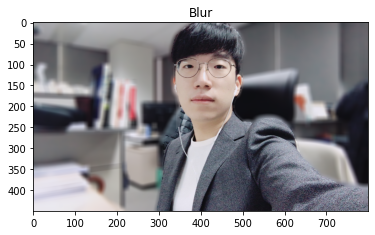

In [46]:
pr_concat = np.where(pr_mask_color==255, pr_orig, pr_bg_blur)
plt.imshow(cv2.cvtColor(pr_concat, cv2.COLOR_BGR2RGB))
plt.title('Blur')
plt.show()



----




# 2. 다른 이미지에도 적용 해 보기!


* 복습용 이미지에 적용해 본 것 처럼, 다른 이미지에도 적용 해보자.
* 고양이 이미지 대신, 애완조의 사진을 가져와 사용해보았습니다:) 
* 애완조 이미지 배경을 블러 처리 해 보고, 배경도 바꿔보겠습니다.

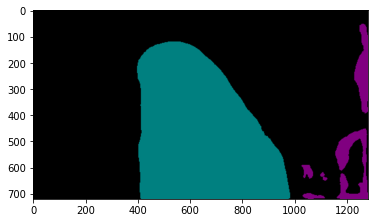

In [21]:
# 다운로드 한 모델을 이용해 PixelLib로 사용할 세그멘테이션 모델을 생성
# 모델은 위에 불러온 모델을 그대로 사용합니다. 
# 출력 값을 확인! 
segvalues_bird, output_bird = model.segmentAsPascalvoc(bird_path)
plt.imshow(output_bird)
plt.show()

In [22]:
segvalues_bird

{'class_ids': array([0, 3, 5]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [23]:
# class_id 를 통해 어떤 물체가 담겨있는지 확인 
for class_id in segvalues_bird['class_ids']:
        print(LABEL_NAMES[class_id])

background
bird
bottle


In [24]:
# 새 는 4번째 , index번호는 3 
colormap[3]

array([128, 128,   0])

In [25]:
#bgr b128,g128,r 0
#rgb  0, 128, 128
seg_color_bird = (0,128,128)
print(seg_color_bird)

(0, 128, 128)


(720, 1280)


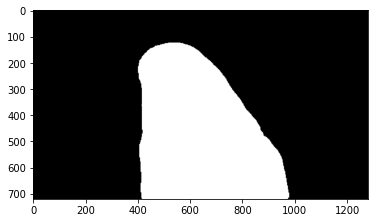

In [26]:
# seg_color 로만 이루어진 마스크를 만들어 봅시다 
#output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)

seg_map_bird = np.all(output_bird==seg_color_bird, axis=-1)
print(seg_map_bird.shape)
plt.imshow(seg_map_bird, cmap='gray')
plt.show()

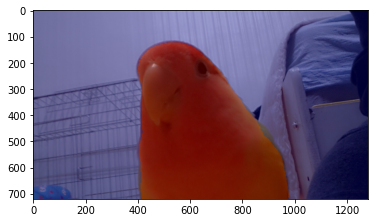

In [27]:
# 원본 이미지와 겹쳐보고, 세그멘테이션이 잘 됬는지 확인!

bird_show = bird_orig.copy()

# True와 False인 값을 각각 255와 0으로 바꿔줍니다.
bird_mask = seg_map_bird.astype(np.uint8) * 255

#255와 0을 적당한 색상으로 바꿉니다.
color_mask_bird = cv2.applyColorMap(bird_mask, cv2.COLORMAP_JET)

#원본 이미지와 마스크를 적당히 합쳐봅니다.
#두 이미지를 섞는 비율은 0.6, 0.4
bird_show = cv2.addWeighted(bird_show, 0.6, color_mask_bird, 0.4, 0.0)

plt.imshow(cv2.cvtColor(bird_show, cv2.COLOR_BGR2RGB))
plt.show()

## 2-1 배경 흐리게 하기 

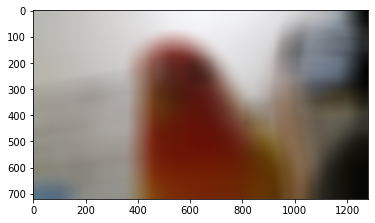

In [28]:
# blur() 함수를 이용해 배경을 흐리게 만들겁니다.
bird_orig_blur = cv2.blur(bird_orig, (100,100))  
plt.imshow(cv2.cvtColor(bird_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

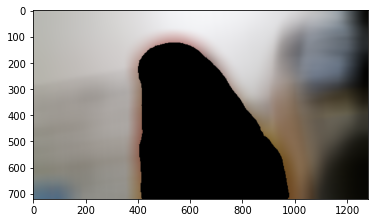

In [29]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해 배경만 추출 
bird_mask_color = cv2.cvtColor(bird_mask, cv2.COLOR_GRAY2BGR)
bird_bg_mask = cv2.bitwise_not(bird_mask_color)
bird_bg_blur = cv2.bitwise_and(bird_orig_blur, bird_bg_mask)
plt.imshow(cv2.cvtColor(bird_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

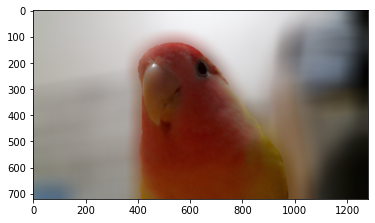

In [30]:
# 배경과 원본 이미지를 합성!
bird_concat = np.where(bird_mask_color==255, bird_orig, bird_bg_blur)
img = cv2.cvtColor(bird_concat, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 2-2-1 다른 배경 합성하기 - change_bg


* 다른 배경을 합성하기 위해선.. 배경을 제거한 bird 이미지에 배경을 + 해 주면 될 것 같은데.. 


* 우선, bird 이미지에서 배경을 제거한 후 출력 해보자. 
    * pixellib의 기능으로 손쉽게 변경해 줄 수 잇었다..! 

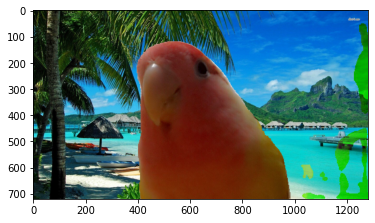

In [31]:
change_bg = alter_bg()
change_bg.load_pascalvoc_model(model_file)
change_img = change_bg.change_bg_img(bird_path, back_path, output_image_name="new_bird.jpg")
plt.imshow(cv2.cvtColor(change_img, cv2.COLOR_BGR2RGB))
plt.show()

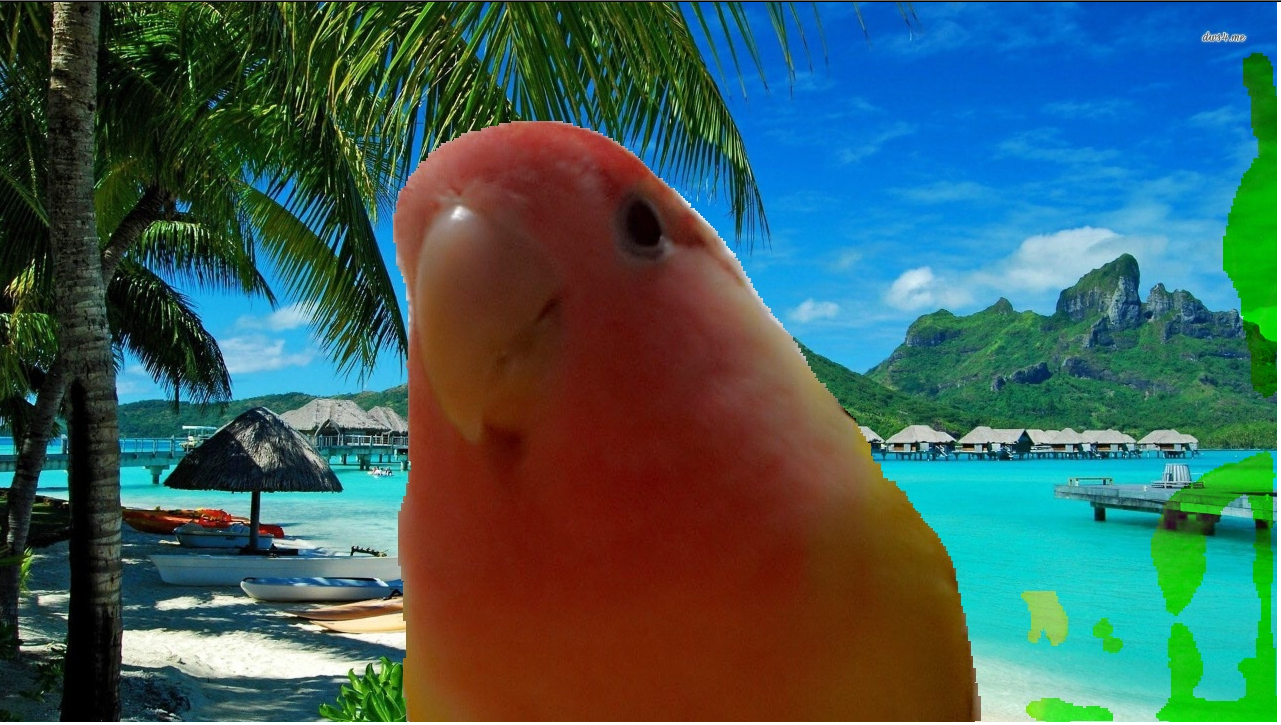
* 이미지도 같이 저장 할 수 있어서 좋긴하지만.. 오른쪽 부분에 불필요한 부분이 보인다.  
* 위에서 추출 한 마스크를 써 봤으면 좋겠는데.. 

## 2-2-2 다른 배경 합성하기 - SeamlessClone

* 두 이미지의 특징을 살려 알아서 합성하는 기능도 있다길래 한번 사용해 보았다 


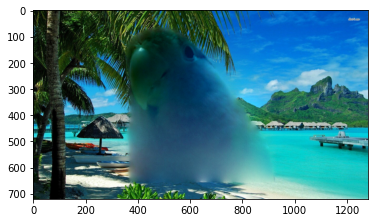

In [32]:
# SeamlessClone을 활용한 이미지 합성 (seamlessclone.py)

# #--① 합성 대상 영상 읽기
# back_path - 배경
# bird_path - 합성 할 것 

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
# mask = np.full_like(bird_orig, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = bird_orig.shape[:2]
center = (width//2, height//2)
 
#--④ seamlessClone 으로 합성 
normal = cv2.seamlessClone(bird_orig, back_orig, bird_mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(bird_orig, back_orig, bird_mask, center, cv2.MIXED_CLONE)
#--⑤ 결과 출력

plt.imshow(cv2.cvtColor(mixed, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(normal, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.imshow('normal', normal)
# cv2.imshow('mixed', mixed)
# cv2.waitKey()
# cv2.destroyAllWindows()

~~블루버드...~~  
* 오른쪽에 불필요한 부분도 없고, 배경 이미지 사이즈가 동일해 따로 잡아줘야할 부분은 없었지만.. 이미지에 완전 동화된것같아보이기 때문에 NG! 

* 파랑색도 귀엽다.. 

## 2-2-3 다른 배경 합성하기 - 기본기능 사용하기


* lms에서 배웠던 기능을 사용해 볼 수 없을까 하고 찾아보던차, 우수 프로젝트를 참고해 볼까 하고 들어갔던 분(참고 페이지)의 코드를 보고, 기본 기능을 이용해서 손쉽고 간단하게, 깔 필요 없이!! 해 줄 수 있었다....

* bird 이미지의 마스크를 따서, 배경을 까맣게 해 준 다음, 배경 이미지와 합쳐야한다! 라고만 생각해서, bird 이미지에서 마스크를 따, 배경을 제거한걸 만들려고 생각하다보니 2-2-1, 2-2-2 와 같은 방법을 시도 해 봤던 것이였는데.....    
역시 배운걸 먼저 시도 해 보고 찾아봤었어야 했다...

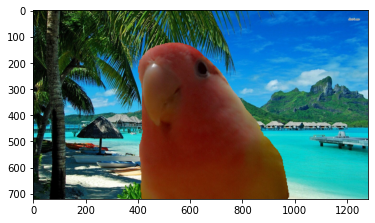

In [33]:
# 배경과 원본 이미지를 합성!
bird_back_concat = np.where(bird_mask_color==255, bird_orig, back_orig)
plt.imshow(cv2.cvtColor(bird_back_concat, cv2.COLOR_BGR2RGB))
plt.show()

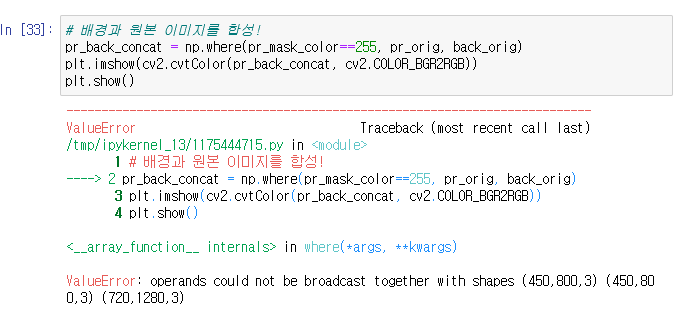


* 배경과 원본 이미지를 합성 해 주기 위해선, 꼭 합성하려는 이미지와, 배경 이미지의 사이즈가 동일 해야 합성 해 줄 수 있다. 같은 사이즈의 이미지를 준비하거나, 사이즈를 같게 resize 해 주자! 

In [52]:
# 배경 이미지를 resize.  인물 사진 이미지와 똑같이 해 주었습니다. 
back_resize = cv2.resize(back_orig, (800,450))


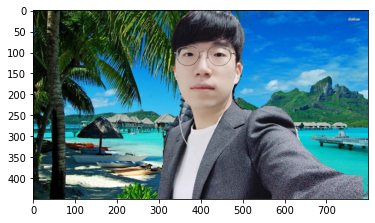

In [53]:
# 배경과 원본 이미지를 합성!
pr_back_concat = np.where(pr_mask_color == 255, pr_orig, back_resize)
plt.imshow(cv2.cvtColor(pr_back_concat, cv2.COLOR_BGR2RGB))
plt.show()

* 바다 가시고 싶으시다던분의 소원을 이뤄드렸습니다ㅎㅎ (복장은 못 바꿔서 죄송합니다)



----




# 3. 직접 해 본 사진에서 문제점 찾기

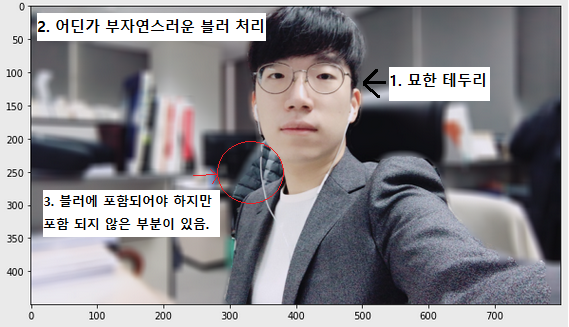


## 1. 묘한 테두리


* 자연스럽게 블러된 배경과 섞인 것이 아니라, 물에 뜬 기름 처럼 배경과 따로 노는 듯 한 이질감이 든다.   
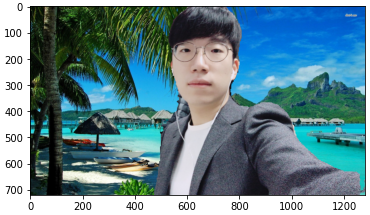
* 배경을 합성한 이미지에서 더 확실하게 확인할 수 있었다. 묘한 테두리가 있어, 배경과 잘 섞여들어가지 않았고, 불필요한 부분 때문에 사진이 더 이상해졌다.. 

## 2. 어딘가 부자연스러운 블러 처리


* 블러 처리를 하는 이유는 다양하지만, 위와같은 사진에서 해 주는 이유는 강조하고 싶은 대상을 좀 더 돋보이기 위해서 해 주는 것이라 생각된다. 하지만, 위에 블러가 적용된 사진을 확인 해 보면, 돋보여주기 보단 그냥 뒷 배경이 흐린 사진에 선명한 대상이 얹어져 있을 뿐이다.   


## 3. 블러에 포함되야 하지만, 포함되지 않은 부분 


* 새(bird) 사진의 경우, 장애물이 많이 없고 뚜렷한 특징 덕분에 별 문제가 없었던것 같지만, 인물 사진의 경우엔 이어폰선이나, 외투의 모양이 함께 나왔다. 선명하게 보여야 할 부분은 사람이지, 옷이 아니기 때문에 불필요한 부분도 확실하게 블러 처리가 되어줘야한다. 

* 블러 처리가 잘 된 예 - 가우시안 흐림 효과 [(참고페이지)](https://www.adobe.com/kr/creativecloud/photography/discover/gaussian-blur.html)  


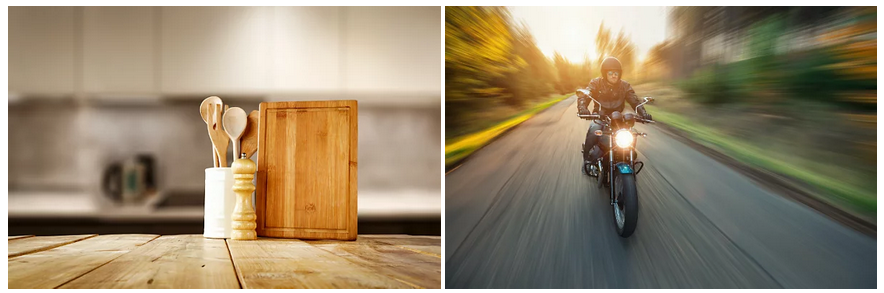



----




# 4. 해결 방법을 제안 해 보기 


* 우선, LMS 상에서 제시했던 몇가지 방법이 있다. 이 방법과 참고 페이지 등을 활용해, 단순히 어떠한 기술을 사용한다! 가 아닌, __**DeepLab 모델의 Semantic Segmentation이 만들어낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘**__ 이 포함된 솔루션을 제시 해 봅시다. 

     1. 세그멘테이션의 한계
     2. 피사계 심도 이해하기
     3. 3D Camera 활용하기
     4. 소프트웨어 기술 활용하기 
     5. 다른 기술과 융합 해 보기 

## 4-1 해결 방안 1. 가우시안 필터 적용하기 

* 가우시안 필터란 가우시안 분포 함수를 근사하여 생성한 필터 마스크를 사용하는 필터링 기법입니다. 중앙부에서 비교적 큰 값을 가지고, 사이드로 갈 수록 행렬 원소 값이 0에 가까운 작은 값을 가집니다. 

* 위에서 적용했던 블러(blur)는 입력 영상에서 특정 픽셀과 주변 픽셀들의 산술 평균을 결과 영상 픽셀 값에 설정하는 평균값 필터 방식이므로, 다른 방식을 적용해 위의 블러와 비교 해보고 문제점 해결이 잘 되었는지 확인 해 보도록 하겠습니다. 

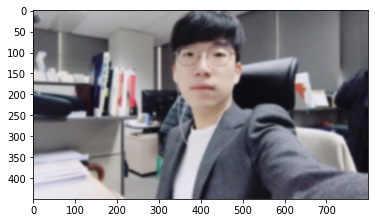

In [41]:
# 가우시안 필터 적용 해 보기 
# GaussianBlur() 함수를 이용해 배경을 흐리게 만들겁니다.
pr_orig_Gaus = cv2.GaussianBlur(pr_orig, (13,13), 0)  
plt.imshow(cv2.cvtColor(pr_orig_Gaus, cv2.COLOR_BGR2RGB))
plt.show()


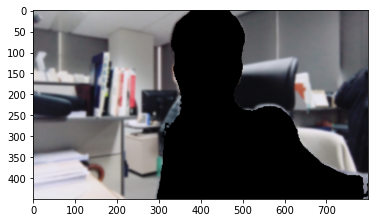

In [42]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해 배경만 추출 
pr_mask_color = cv2.cvtColor(pr_mask, cv2.COLOR_GRAY2BGR)
pr_bg_mask = cv2.bitwise_not(pr_mask_color)
pr_bg_Gaus = cv2.bitwise_and(pr_orig_Gaus, pr_bg_mask)
plt.imshow(cv2.cvtColor(pr_bg_Gaus, cv2.COLOR_BGR2RGB))
plt.show()

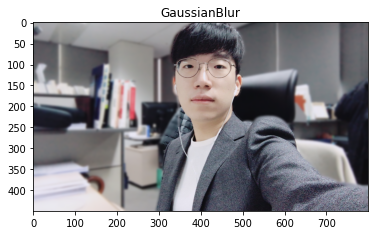

In [54]:
# 필터를 적용한 배경과 이미지 합성 
pr_gaus_concat = np.where(pr_mask_color==255, pr_orig, pr_bg_Gaus)
plt.imshow(cv2.cvtColor(pr_gaus_concat, cv2.COLOR_BGR2RGB))
plt.title('GaussianBlur')
plt.show()

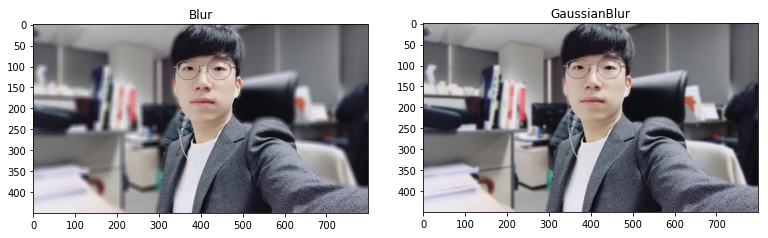  


* 처음 필터에서 봤던 묘한 테두리 부분은 확실히 덜 보이는것 같다. 얼굴과 배경 사이의 경계 부분이 훨신 자연스러워 보인다. 하지만, 이어폰 줄과 얼굴 사이에 있는 부분은 여전히 블러처리 되지 않았다. 선 부분도 얼굴의 일부라고 인식하는걸까..? 


* 포토샵으로 정교하게 처리한 부분보단 확실히 부족한 점이 많아 보인다.

## 4-2 해결방안 2. CRF(Conditional Random Field

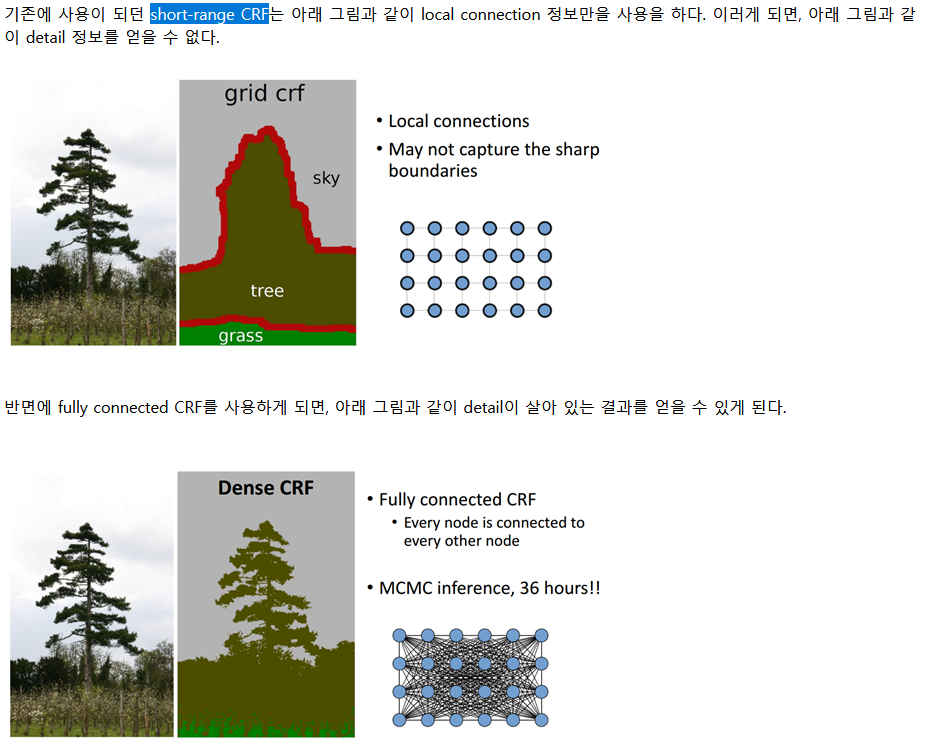  


* [CRF Conditional Random Field](https://m.blog.naver.com/laonple/221017461464)
* CRF는 bilinear interpolation을 통해 원영상 크기로 확대하면 해상도가 떨어지는 문제를 해결하기 위해 사용된 후처리 방법입니다.
    * short-range CRF : 세그멘테이션 노이즈를 없애기 위해 사용된 방법. 
        DCNN 에서 여러 conv + pooling 단계를 거친 후에 적용하게되면 결과가 더 나빠짐.
    * Fully Connected CRF : 2011년 스탠포드 대학교에서 발표된 논문. 전체 픽셀을 모두 연결한 방법. short-range CRF 보다 detail이 살아있고, 확실한 정보를 얻을 수 있다 함. 


* 블러 값이 20일 때 
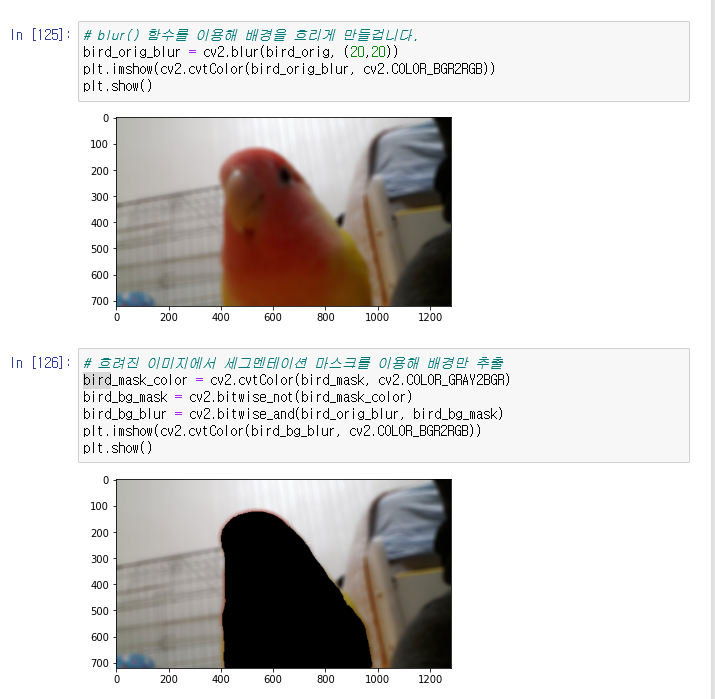  
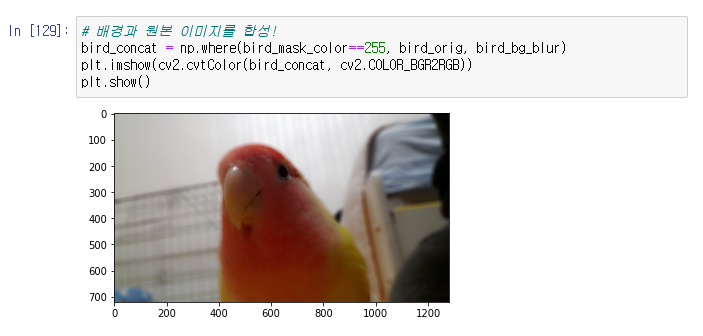  
  
* 블러 값이 50일 때   
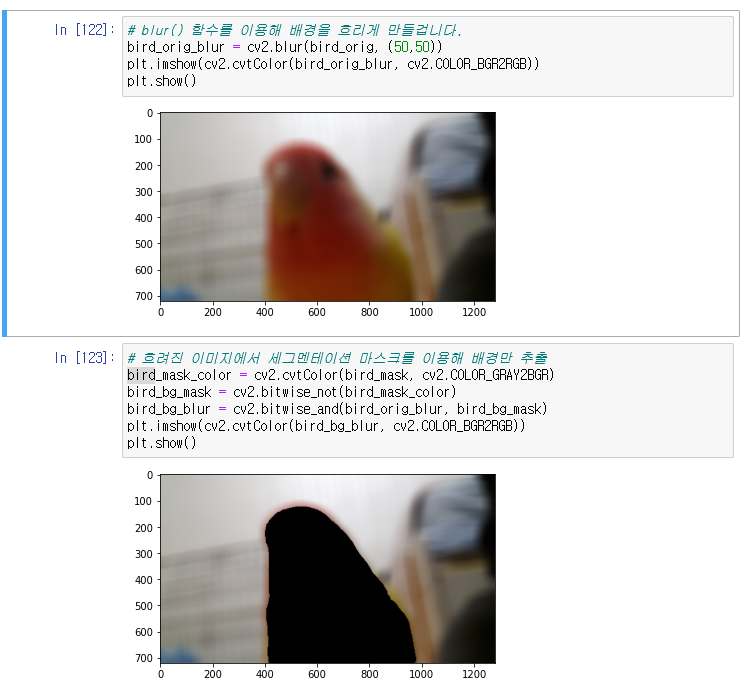
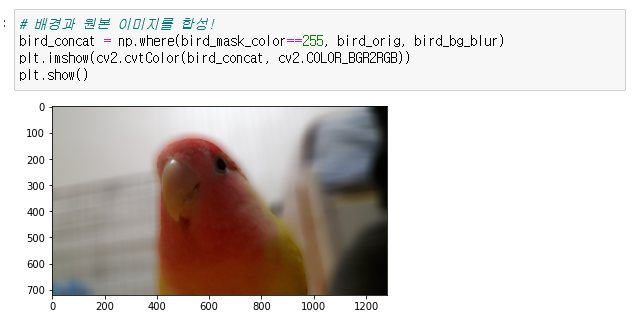

* 블러 값이 100 일 때 
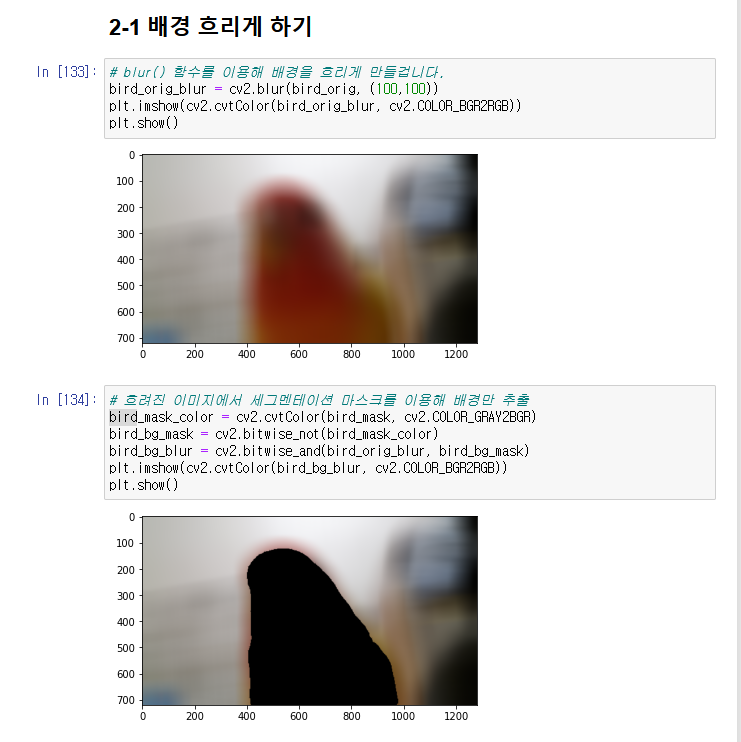
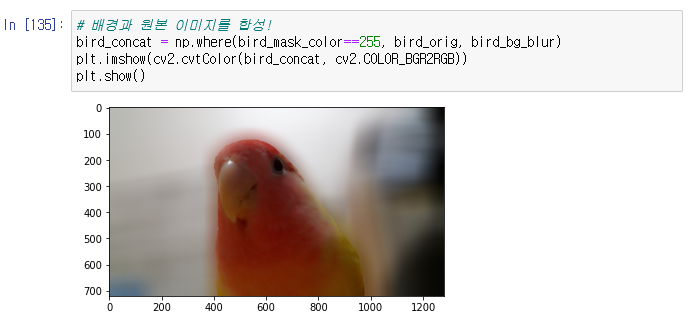

* 블러값에 따라 점점 특정 대상 가에 흐릿한 테두리가 생기기 시작하는데, location 정보만 이용해서 처리했기 때문에, 점점 커 지는게 아닐까? 보통 블러처리! 를 해 준다 하면, 원본은 그대로 있고 배경만 흐릿해 져야하는게 맞는데.. 


* Fully Connected CRF 방법을 적용해서 이미지를 만들어 줬다면, 훨신 정교하고 자연스러운 블러 이미지가 됬을 것같다. 





-----





# 회고!

* 이번 시간엔 이미지를 가져와 특정 부분에 블러 처리를 해 보거나, 배경을 합성하는 등의 이미지 처리를 해 보았다. OpenCV를 통해 이미지 처리를 해 보는건 이번이 두번째 시간이였지만, 아직도 배운기능 보다 안배운 기능이 더 많을 것같아 앞으로 있을 과제들이 기다려진다. 


* 이미지 블러 처리는 보통 포토샵에서 많이 했었던 작업이고, 요즘은 파워포인트의 기본 기능으로도 배경을 제거하거나, 블러 처리를 하는 등 다양한 이미지 작업을 할 수 있다 한다. 그런 작업들이 어떤 식으로 처리되고 적용되는지를 알 수 있는 시간이였던것 같다. 그런 편리한 기능들 하나하나가 전부 무수한 코드로 되어있을 것이다 라고 생각하니 머리가 아파온다.. 


* 여담으로 애완동물 사진을 내가 배운 기능으로 이것 저것 해 볼 수 있다는게 너무 재밌었다. 단순히 사진 찍고 필터만 씌웠다가 아닌, 내가 배운 것들과 인터넷을 통해 찾아보고 적용한 부분이니까 더 재밌었었던것 같다 :) 그치만 문제점 해결 부분은 너무 어려워.. 




------





# 참고 페이지

[이미지 배경 변경](https://ichi.pro/ko/5-jul-ui-kodeulo-modeun-imijiui-baegyeong-byeongyeong-39174112595610)  


[크로마키 합성](https://bkshin.tistory.com/entry/OpenCV-9-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%97%B0%EC%82%B0)  


[크로마키 합성 - 강양인 명예의전당](https://nbviewer.org/github/westyeon/EXPLORATION_IC1/blob/master/Exploration08-Semantic_segmentation.ipynb)  


[OpenCV 블러링 기법과 가우시안 필터](https://blog.naver.com/PostView.naver?blogId=sees111&logNo=222366804864&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView)  


[DenseCRF = Fully-connected CRF](https://dailylime.kr/363)